# NVIDIA Stonk Analysis NVDA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt 
import yfinance as yf
import os
import seaborn as sns


## NVIDIA Info (From Yahoo Finance)

In [8]:
stock = 'NVDA'
nvidia = yf.Ticker(stock)
print(nvidia.history(period="max"))

                                 Open        High         Low       Close  \
Date                                                                        
1999-01-22 00:00:00-05:00    0.040125    0.044783    0.035587    0.037618   
1999-01-25 00:00:00-05:00    0.040603    0.042036    0.037618    0.041559   
1999-01-26 00:00:00-05:00    0.042036    0.042872    0.037737    0.038334   
1999-01-27 00:00:00-05:00    0.038453    0.039409    0.036303    0.038215   
1999-01-28 00:00:00-05:00    0.038215    0.038453    0.037856    0.038095   
...                               ...         ...         ...         ...   
2024-10-18 00:00:00-04:00  138.669998  138.899994  137.279999  138.000000   
2024-10-21 00:00:00-04:00  138.130005  143.710007  138.000000  143.710007   
2024-10-22 00:00:00-04:00  142.910004  144.419998  141.779999  143.589996   
2024-10-23 00:00:00-04:00  142.029999  142.429993  137.460007  139.559998   
2024-10-24 00:00:00-04:00  140.820007  141.350006  138.460007  140.410004   

In [27]:
nvidia.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networki

In [28]:
nvidia.actions

,Dividends,Stock Splits
Date,,
2000-06-27 00:00:00-04:00,0.000000,2.0
2001-09-10 00:00:00-04:00,0.000000,2.0
2006-04-07 00:00:00-04:00,0.000000,2.0
2007-09-11 00:00:00-04:00,0.000000,1.5
2012-11-20 00:00:00-05:00,0.001875,0.0
2013-02-26 00:00:00-05:00,0.001875,0.0
2013-05-21 00:00:00-04:00,0.001875,0.0
2013-08-20 00:00:00-04:00,0.001875,0.0
2013-11-19 00:00:00-05:00,0.002125,0.0


In [29]:
nvidia.analyst_price_targets

{'current': 142.4101,
 'low': 75.4,
 'high': 202.79,
 'mean': 149.03,
 'median': 150.0}

In [30]:
nvidia.balance_sheet

,2024-01-31,2023-01-31,2022-01-31,2021-01-31,2020-01-31
Treasury Shares Number,NaN,NaN,NaN,13800000000.0,13700576960.0
Ordinary Shares Number,24640000000.0,24661365720.0,25060000000.0,24800000000.0,NaN
Share Issued,24640000000.0,24661365720.0,25060000000.0,38600000000.0,NaN
Net Debt,2429000000.0,7564000000.0,8956000000.0,6116000000.0,NaN
Total Debt,11056000000.0,12031000000.0,11831000000.0,7597000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,-21000000.0,-11000000.0
Gross Accounts Receivable,NaN,NaN,NaN,2450000000.0,1668000000.0
Cash Cash Equivalents And Short Term Investments,25984000000.0,13296000000.0,21208000000.0,11561000000.0,NaN
Other Short Term Investments,18704000000.0,9907000000.0,19218000000.0,10714000000.0,NaN


## Download data

In [14]:
data = yf.download(stock)

# Convert the index to timezone-naive
data.index = data.index.tz_localize(None)

# Save the data to an Excel file
excel_file = f'{stock}_data_all.xlsx'
data.to_excel(excel_file, sheet_name=stock)

print(f'All available data for {stock} has been saved to {os.getcwd()}\\{excel_file}')

[*********************100%***********************]  1 of 1 completed


All available data for NVDA has been saved to C:\Users\zanel\NVDA_data_all.xlsx


## Stock Plot

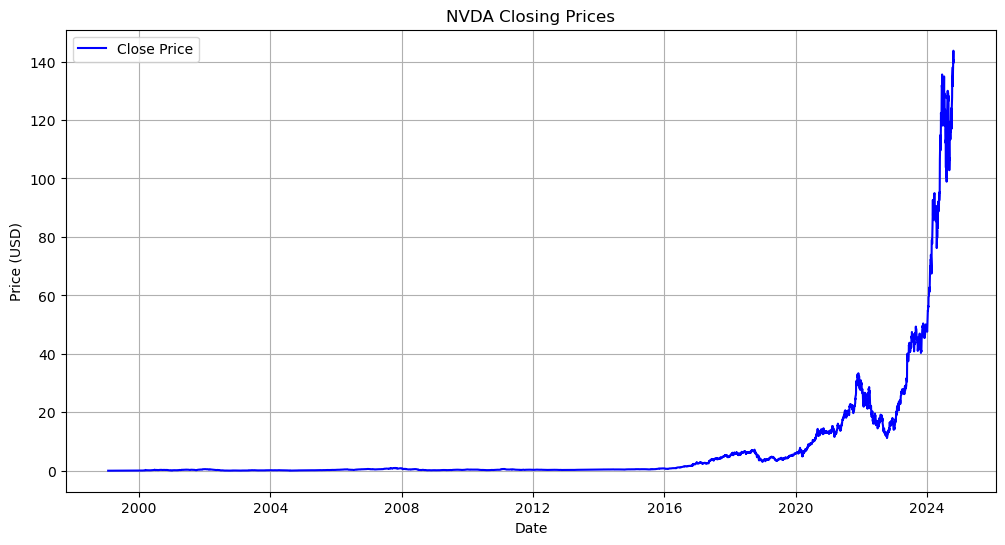

In [23]:
# Create a larger plot
plt.figure(figsize=(12, 6))  # Set the figure size (width, height) in inches

# Plot the closing prices
plt.plot(data['Close'], label='Close Price', color='blue')

# Add title and labels
plt.title(f'{stock} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

## Exploratory Data Analysis (EDA)

Here, we look into the historical data of NVIDIA, purely from data POV. We do not include any sentiment (hype, news, policices) and business decisions/directions.

In [93]:
data['Daily Returns'] = data['Close'].pct_change().values.flatten().tolist()

In [95]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Daily Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,,
1999-01-22,0.037618,0.041016,0.048828,0.038802,0.043750,2714688000,NaN
1999-01-25,0.041559,0.045313,0.045833,0.041016,0.044271,510480000,0.104764
1999-01-26,0.038334,0.041797,0.046745,0.041146,0.045833,343200000,-0.077594
1999-01-27,0.038215,0.041667,0.042969,0.039583,0.041927,244368000,-0.003110
1999-01-28,0.038095,0.041536,0.041927,0.041276,0.041667,227520000,-0.003144


In [96]:
# Show size of the dataset
data.shape

(6482, 7)

In [97]:
data.dtypes

Price          Ticker
Adj Close      NVDA      float64
Close          NVDA      float64
High           NVDA      float64
Low            NVDA      float64
Open           NVDA      float64
Volume         NVDA        int64
Daily Returns            float64
dtype: object

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6482 entries, 1999-01-22 to 2024-10-24
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  6482 non-null   float64
 1   (Close, NVDA)      6482 non-null   float64
 2   (High, NVDA)       6482 non-null   float64
 3   (Low, NVDA)        6482 non-null   float64
 4   (Open, NVDA)       6482 non-null   float64
 5   (Volume, NVDA)     6482 non-null   int64  
 6   (Daily Returns, )  6481 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 405.1 KB


In [99]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume,Daily Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
count,6482.000000,6482.000000,6482.000000,6482.000000,6482.000000,6.482000e+03,6481.000000
mean,7.262502,7.289191,7.423609,7.140428,7.287152,6.033827e+08,0.001968
std,19.539409,19.536997,19.910297,19.122532,19.540945,4.312765e+08,0.037866
min,0.031289,0.034115,0.035547,0.033333,0.034896,1.968000e+07,-0.352336
25%,0.255770,0.278875,0.287000,0.271521,0.279000,3.430338e+08,-0.016293
50%,0.432589,0.461750,0.468125,0.454500,0.461250,5.042335e+08,0.001306
75%,4.329483,4.351312,4.436188,4.297125,4.359938,7.347530e+08,0.018348
max,143.710007,143.710007,144.419998,141.779999,142.910004,9.230856e+09,0.424148


### Closing Price

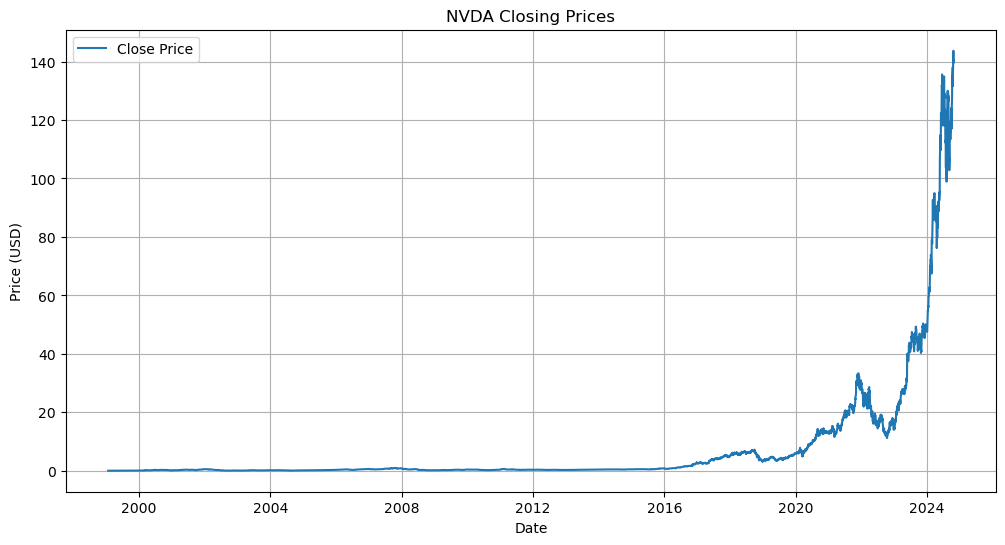

In [100]:
# Closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{stock} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

### Daily Returns 

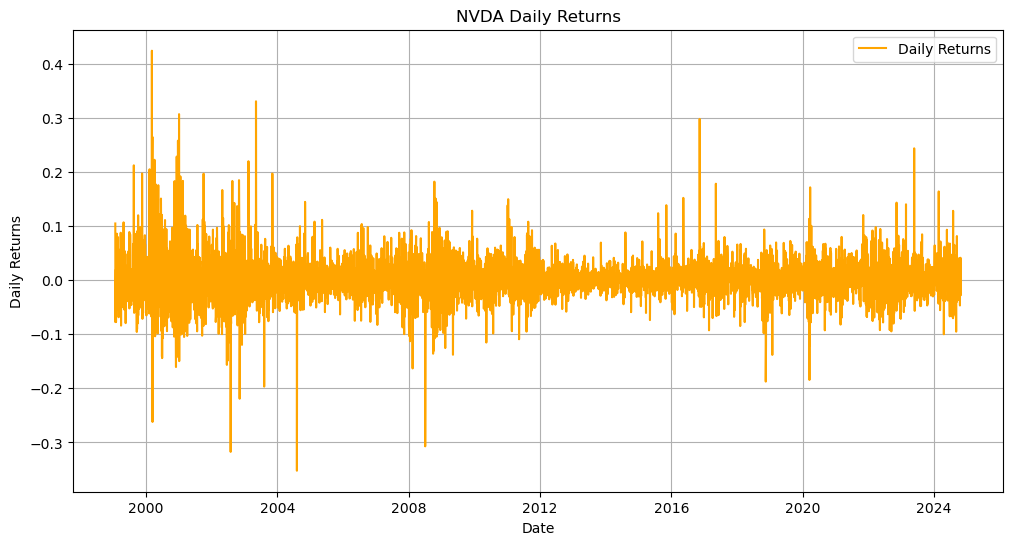

In [108]:
# Daily returns
plt.figure(figsize=(12, 6))
plt.plot(data['Daily Returns'], label='Daily Returns', color='orange')
plt.title(f'{stock} Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid()
plt.show()

### Volume 

In [118]:
data['Volume'].describe()

Ticker,NVDA
count,6.482000e+03
mean,6.033827e+08
std,4.312765e+08
min,1.968000e+07
25%,3.430338e+08
50%,5.042335e+08
75%,7.347530e+08
max,9.230856e+09


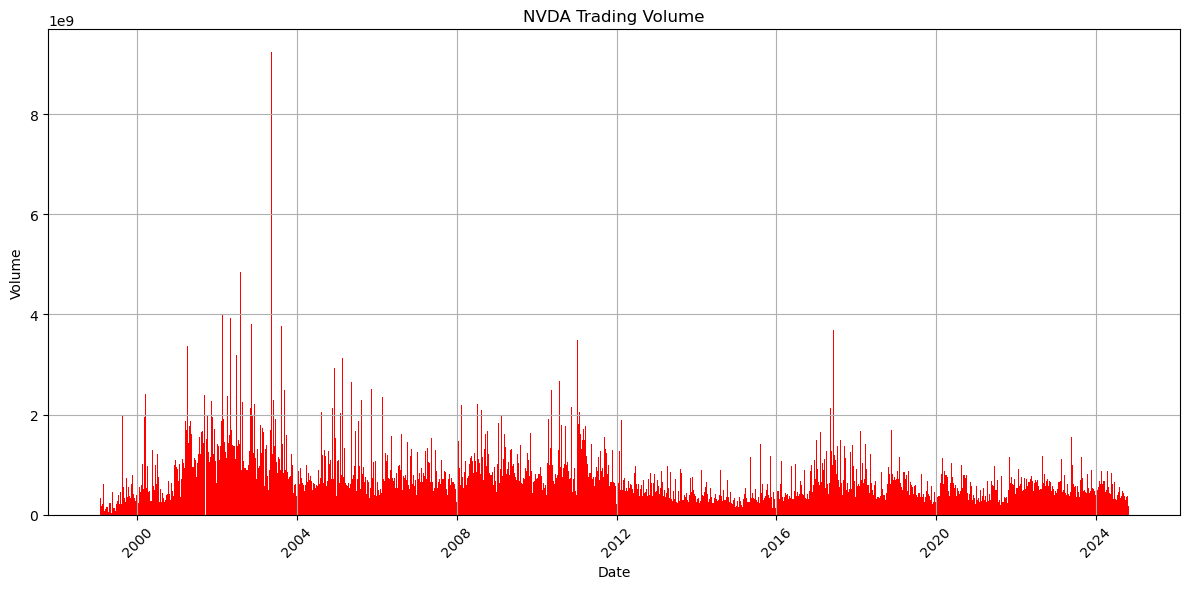

In [123]:
# Volume over time
plt.figure(figsize=(12, 6))
# plt.bar(data.index, data['Volume'], color='grey')
plt.bar(data.index, data['Volume'].values.reshape(len(data)), color='red', width=5.0)
plt.title(f'{stock} Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

### When splits

IMPORTANT NOTE 

yahoo finance close price is adjusted for splits 
while 
adj close is adjusted for split and dividend 

https://stackoverflow.com/questions/59799567/how-does-yahoo-finance-calculate-adjusted-close-stock-prices

In [180]:
nvidia_actions_df = nvidia.actions

# Convert the index to timezone-unaware
nvidia_actions_df.index = nvidia_actions_df.index.tz_convert('UTC').tz_localize(None)   ## NOT IDEMPOTENT

In [153]:
nvidia_actions_df.head()

,Dividends,Stock Splits
Date,,
2000-06-27 04:00:00,0.000000,2.0
2001-09-10 04:00:00,0.000000,2.0
2006-04-07 04:00:00,0.000000,2.0
2007-09-11 04:00:00,0.000000,1.5
2012-11-20 05:00:00,0.001875,0.0


In [167]:
nvidia_stock_split_info = nvidia_actions_df[nvidia_actions_df['Stock Splits'] > 0.0]
nvidia_stock_split_info

,Dividends,Stock Splits
Date,,
2000-06-27 04:00:00,0.0,2.0
2001-09-10 04:00:00,0.0,2.0
2006-04-07 04:00:00,0.0,2.0
2007-09-11 04:00:00,0.0,1.5
2021-07-20 04:00:00,0.0,4.0
2024-06-10 04:00:00,0.0,10.0


In [175]:
nvidia_stock_split_info.iloc[-1].name

Timestamp('2024-06-10 04:00:00')

In [179]:
data[data.index < nvidia_stock_split_info.iloc[-1].name]

Price,Adj Close,Close,High,Low,Open,Volume,Daily Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,,
1999-01-22,0.037618,0.041016,0.048828,0.038802,0.043750,2714688000,NaN
1999-01-25,0.041559,0.045313,0.045833,0.041016,0.044271,510480000,0.104764
1999-01-26,0.038334,0.041797,0.046745,0.041146,0.045833,343200000,-0.077594
1999-01-27,0.038215,0.041667,0.042969,0.039583,0.041927,244368000,-0.003110
1999-01-28,0.038095,0.041536,0.041927,0.041276,0.041667,227520000,-0.003144
...,...,...,...,...,...,...,...
2024-06-04,116.417473,116.436996,116.599998,114.044998,115.716003,403324000,0.012496
2024-06-05,122.419472,122.440002,122.448997,117.468002,118.371002,528402000,0.051556


In [177]:
data[data.index >= nvidia_stock_split_info.iloc[-1].name]

Price,Adj Close,Close,High,Low,Open,Volume,Daily Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,,
2024-06-11,120.899658,120.910004,122.870003,118.739998,121.769997,222551200,-0.007226
2024-06-12,125.189285,125.199997,126.879997,122.570000,123.059998,299595000,0.035481
2024-06-13,129.598907,129.610001,129.800003,127.160004,129.389999,260704500,0.035224
2024-06-14,131.868729,131.880005,132.839996,128.320007,129.960007,309320400,0.017514
2024-06-17,130.968796,130.979996,133.729996,129.580002,132.990005,288504400,-0.006824
...,...,...,...,...,...,...,...
2024-10-18,138.000000,138.000000,138.899994,137.279999,138.669998,176090200,0.007814
2024-10-21,143.710007,143.710007,143.710007,138.000000,138.130005,264554500,0.041377


#### Plot Volume Change with split change

In [168]:
# Define the midpoint date
midpoint_date = data.index[len(data) // 2]
midpoint_date

Timestamp('2011-12-07 00:00:00')

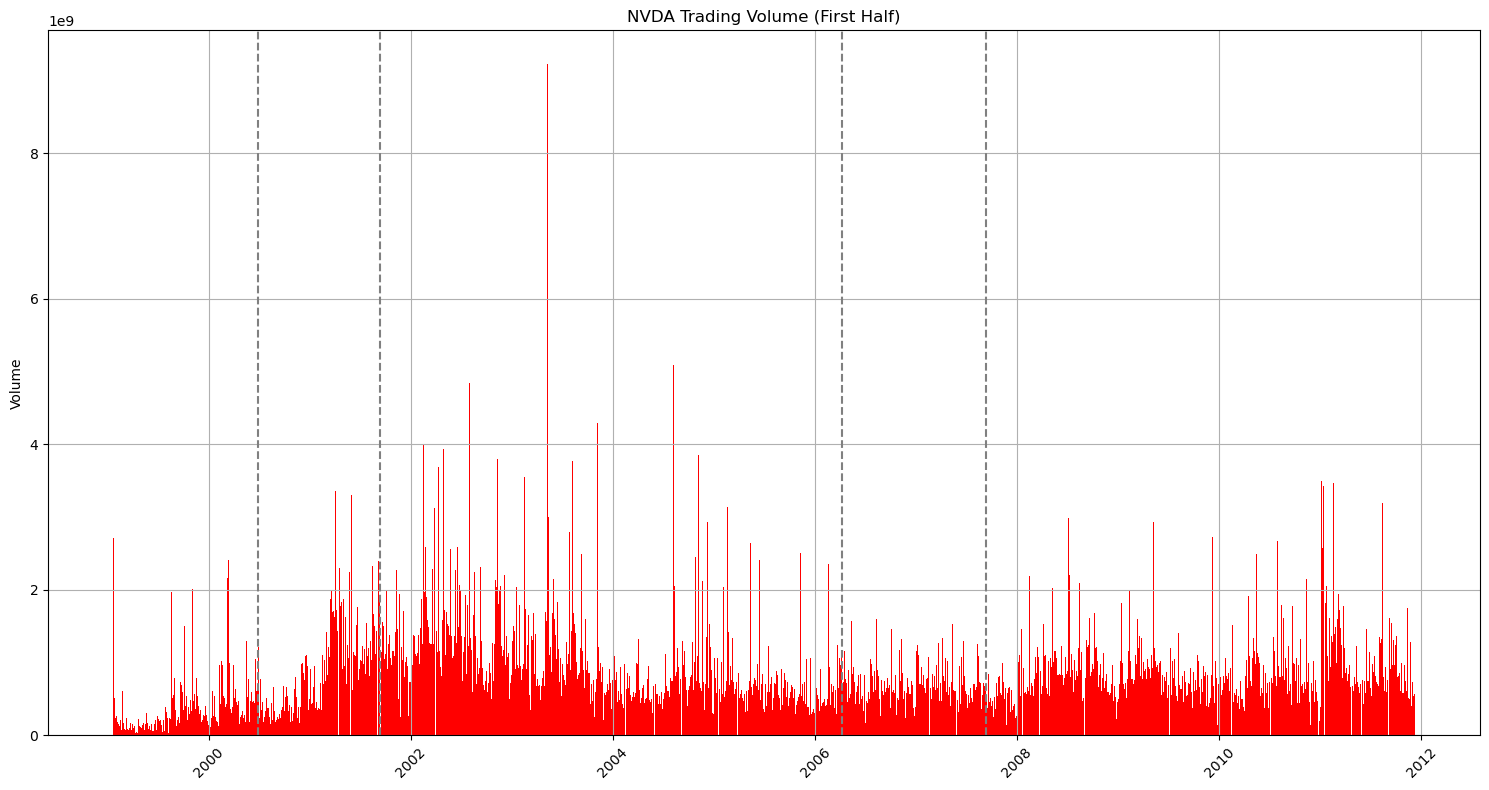

In [169]:
first_half = data[data.index <= midpoint_date]
split_dates_first_half = nvidia_stock_split_info[nvidia_stock_split_info.index <= midpoint_date]

# Plot first half of the data in the first 
plt.figure(figsize=(15, 8))
plt.bar(first_half.index, first_half['Volume'].values.reshape(len(first_half)), color='red', width=3.0)
plt.title(f'{stock} Trading Volume (First Half)')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

for split_date in split_dates_first_half.index:
    plt.axvline(x=split_date, color='grey', linestyle='--', label='Stock Split')

# plt.ylim(0, data['Volume'].max())  # Set y-axis limit
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

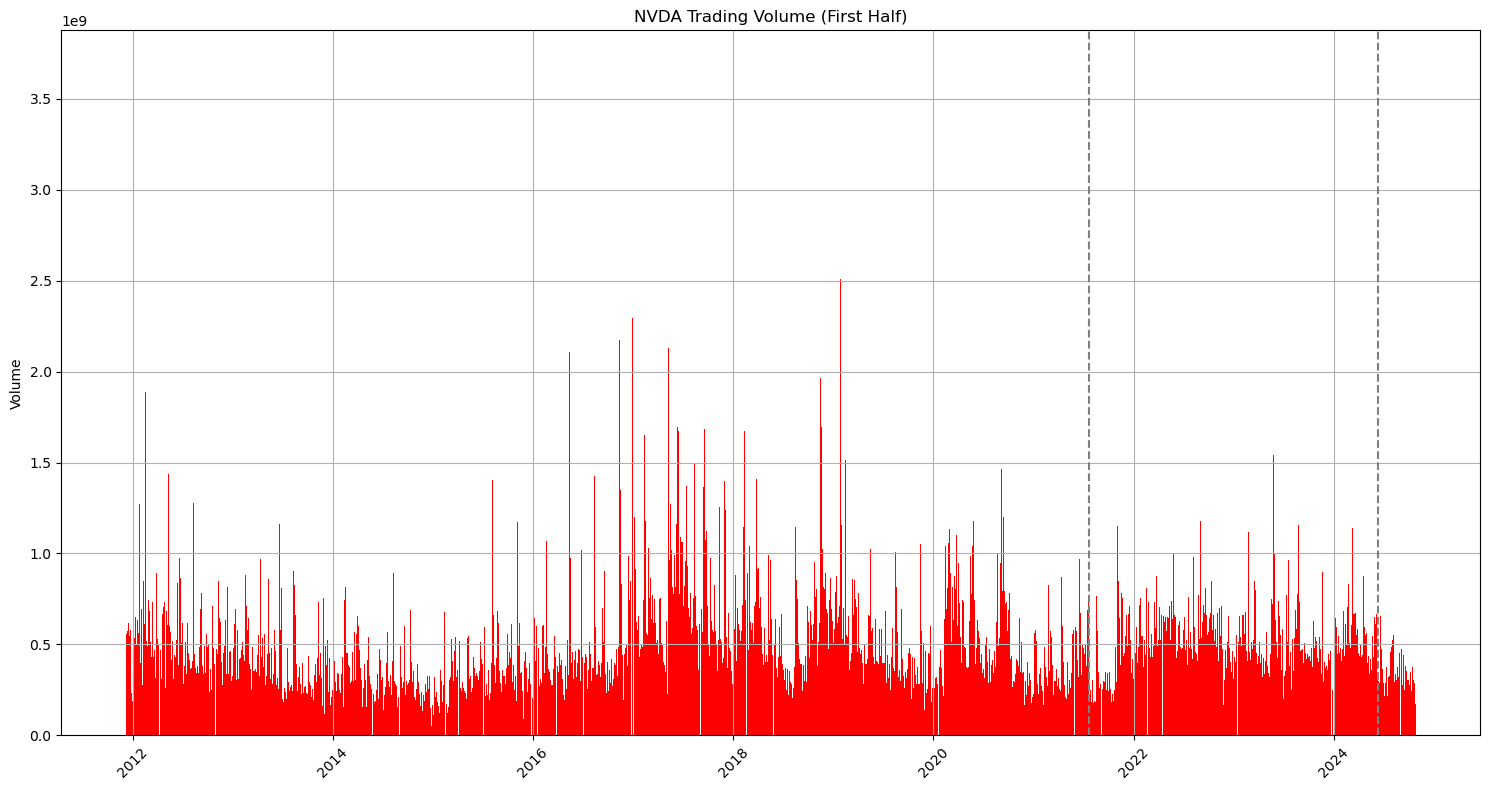

In [170]:
second_half = data[data.index > midpoint_date]
split_dates_second_half = nvidia_stock_split_info[nvidia_stock_split_info.index > midpoint_date]

# Plot first half of the data in the first 
plt.figure(figsize=(15, 8))
plt.bar(second_half.index, second_half['Volume'].values.reshape(len(second_half)), color='red', width=3.0)
plt.title(f'{stock} Trading Volume (First Half)')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

for split_date in split_dates_second_half.index:
    plt.axvline(x=split_date, color='grey', linestyle='--', label='Stock Split')

# plt.ylim(0, data['Volume'].max())  # Set y-axis limit
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## Growth Estimates Statistically Reasonable?